In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

import hoomd
import gsd.hoomd
import coxeter

In [10]:
kT=1

In [11]:
traj = gsd.hoomd.open('./DATA/randomized.gsd', mode='rb')

In [12]:
idx = np.array([0,4,7,10])

In [13]:
def dihedral(p):
    """formula from Wikipedia article on "Dihedral angle"; formula was removed
    from the most recent version of article (no idea why, the article is a
    mess at the moment) but the formula can be found in at this permalink to
    an old version of the article:
    https://en.wikipedia.org/w/index.php?title=Dihedral_angle&oldid=689165217#Angle_between_three_vectors
    uses 1 sqrt, 3 cross products"""
    p0 = p[0]
    p1 = p[1]
    p2 = p[2]
    p3 = p[3]

    b0 = -1.0*(p1 - p0)
    b1 = p2 - p1
    b2 = p3 - p2

    b0xb1 = np.cross(b0, b1)
    b1xb2 = np.cross(b2, b1)

    b0xb1_x_b1xb2 = np.cross(b0xb1, b1xb2)

    y = np.dot(b0xb1_x_b1xb2, b1)*(1.0/np.linalg.norm(b1))
    x = np.dot(b0xb1, b1xb2)

    return np.degrees(np.arctan2(y, x))

In [14]:
op_arr = []
for frame in traj:
    op = dihedral(frame.particles.position[idx])
    op_arr.append(op)
    
op_arr = np.asarray(op_arr)

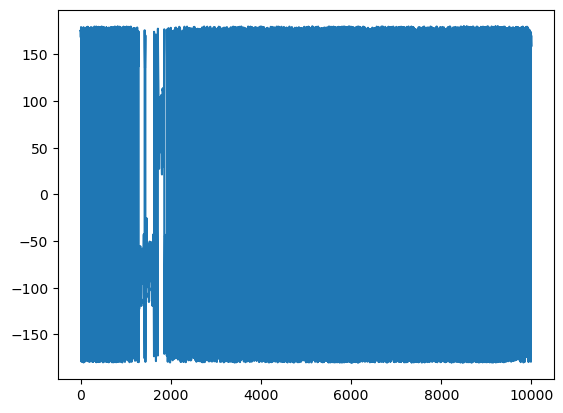

In [15]:
plt.plot(op_arr)

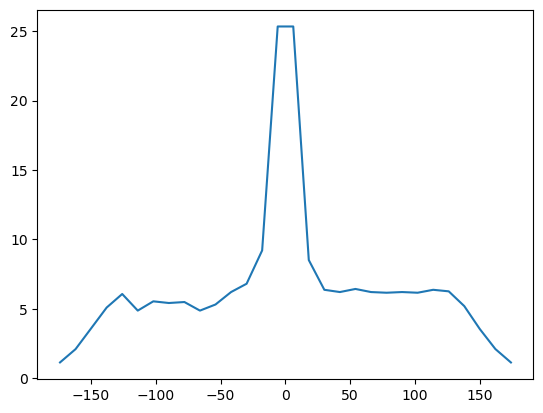

In [16]:
hist = np.histogram(op_arr, bins=30)
prob = hist[0].T/np.sum(hist[0].T)
mids = 0.5*(hist[1][1:]+hist[1][:-1])
freeE = -kT*np.log(prob+1e-11)

plt.plot(mids, freeE)
plt.show()